In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import sys
sys.path.append("..")
from src.data import Dataset
from src.model import NeuralNetwork

# Training set

In [2]:
d = Dataset(dataset_path="../data/processed/train_07_18_2021.csv")
x_train, x_val, y_train, y_val = d.get_splits()

# Building the network

In [3]:
net = NeuralNetwork(layers=[layers.Dense(units=132, activation='relu'),
                            layers.Dense(units=68, activation='relu'),
                            layers.Dense(units=30, activation='relu'),
                            layers.Dense(10, activation='softmax')], 
                    optimizer=keras.optimizers.RMSprop(), 
                    loss=keras.losses.SparseCategoricalCrossentropy(), 
                    metrics=["accuracy"])

In [4]:

history = net.fit(x_train, 
        y_train, 
        validation_data=(x_val, y_val),
        batch_size=128, 
        epochs=50);

Epoch 1/50
32/32 - 1s - loss: 1.5941 - accuracy: 0.4838 - val_loss: 1.0609 - val_accuracy: 0.7178
Epoch 2/50
32/32 - 0s - loss: 0.9412 - accuracy: 0.7207 - val_loss: 0.7755 - val_accuracy: 0.7644
Epoch 3/50
32/32 - 0s - loss: 0.6733 - accuracy: 0.8061 - val_loss: 0.6344 - val_accuracy: 0.7778
Epoch 4/50
32/32 - 0s - loss: 0.5207 - accuracy: 0.8481 - val_loss: 0.5125 - val_accuracy: 0.8244
Epoch 5/50
32/32 - 0s - loss: 0.4150 - accuracy: 0.8753 - val_loss: 0.4686 - val_accuracy: 0.8467
Epoch 6/50
32/32 - 0s - loss: 0.3432 - accuracy: 0.8950 - val_loss: 0.3811 - val_accuracy: 0.8711
Epoch 7/50
32/32 - 0s - loss: 0.2906 - accuracy: 0.9160 - val_loss: 0.3616 - val_accuracy: 0.8822
Epoch 8/50
32/32 - 0s - loss: 0.2425 - accuracy: 0.9311 - val_loss: 0.3604 - val_accuracy: 0.8844
Epoch 9/50
32/32 - 0s - loss: 0.2051 - accuracy: 0.9425 - val_loss: 0.3099 - val_accuracy: 0.9022
Epoch 10/50
32/32 - 0s - loss: 0.1778 - accuracy: 0.9513 - val_loss: 0.3279 - val_accuracy: 0.8933
Epoch 11/50
32/32 -

In [5]:

net.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 132)               17556     
_________________________________________________________________
dense_5 (Dense)              (None, 68)                9044      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                2070      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
Total params: 28,980
Trainable params: 28,980
Non-trainable params: 0
_________________________________________________________________


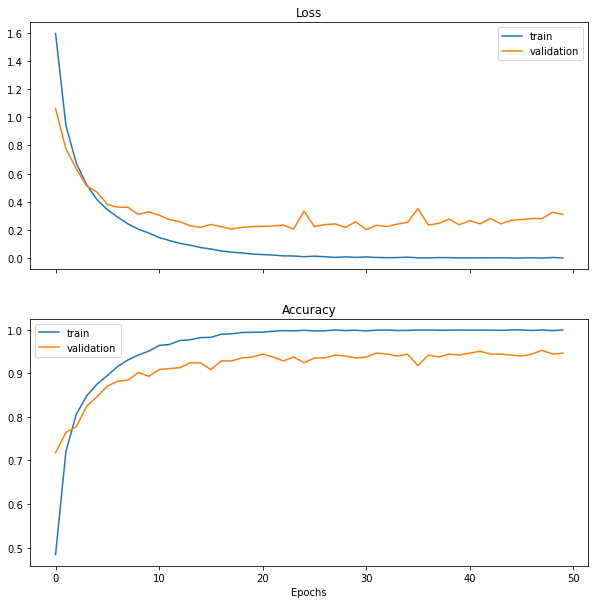

In [6]:
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(10,10))
plt.xlabel("Epochs")
ax1.set_title("Loss")

ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend()

ax2.set_title("Accuracy")
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='validation')
ax2.legend()

# Test folds performance

In [7]:
import numpy as np

loss = []
accuracy = []

for fold in [5, 7, 8, 9, 10]:
    td = Dataset(dataset_path=f"../data/processed/test_{fold}_07_18_2021.csv", test_size=0)
    x_test, y_test = td.get_splits()
    results = net.model.evaluate(x_test, y_test, batch_size=128)
    loss.append(results[0])
    accuracy.append(results[1])

print("\nAccuracy:")
print(f"\tMean: {np.mean(accuracy)} \n\tStandard deviation: {np.std(accuracy)}")

print("\nLoss:")
print(f"\tMean: {np.mean(loss)} \n\tStandard deviation: {np.std(loss)}")

7/7 [==============================] - 0s 2ms/step - loss: 4.0820 - accuracy: 0.6260

Accuracy:
	Mean: 0.5967491626739502 
	Standard deviation: 0.04027931915000453

Loss:
	Mean: 4.7022747039794925 
	Standard deviation: 1.0108361744926315
